### Cleaning webscrapped data and other messy text..
> In this post, trying out clean-text for cleaning text data

Cleaning webscrapped data can be a hassle, with html tags, urls, phone numbers, punctuation etc before doing text analysis. Clean-text promises to ease that burden considerably in one line of code, with flexibility regarding what one wants removed, or replaced. Whatsapp chats are also in the same region of difficulty in parsing as web data. I expoerted Data Science Zimbabwe group chats (there are 3 groups) to compare the themes most discussed in the respective groups using a wordcloud, after cleaning the texts. 

In [ ]:
# !pip install unicodedata2
# !pip install wordcloud
# !pip install clean-text ###optional pip install clean-txt[gpl]

clean-text with gpl means it won't default to Python's *unicodedata* package, which apparently has worse results. (Worth checking the differences in a follow up to this post..)

In [2]:
import re
import string

import matplotlib.pyplot as plt
%matplotlib inline
from cleantext import clean
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


We will use regex also to remove the time and number/contact text from a message.

In [4]:
with open('dsz13.txt', 'r', encoding='utf-8') as f:
    chats = f.readlines()

Not specifying the encoding will cause errors.

In [5]:
chats[:10]

['2021/08/17, 11:45 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '2021/08/17, 11:45 am - You created group "DataScienceZimbabwe"\n',
 "2021/08/17, 11:54 am - +44 7592 754029 joined using this group's invite link\n",
 "2021/08/17, 12:05 pm - +263 78 489 2260 joined using this group's invite link\n",
 "2021/08/17, 12:10 pm - +263 77 408 0063 joined using this group's invite link\n",
 "2021/08/17, 12:13 pm - +263 77 578 6283 joined using this group's invite link\n",
 '2021/08/17, 12:25 pm - Evander DS joined using your invite\n',
 "2021/08/17, 12:27 pm - +263 71 880 8533 joined using this group's invite link\n",
 "2021/08/17, 12:41 pm - +263 77 231 5884 joined using this group's invite link\n",
 "2021/08/17, 12:47 pm - +263 78 376 9962 joined using this group's invite link\n"]

In [6]:
chats_ = []

for line in chats:
    line = re.sub(r"[0-9]{4}\/[0-9]{2}\/[0-9]{2}, [0-9]+:[0-9]{2} [ap]m - .+:", "", line)
    line = re.sub(r"\[[0-9]{2}\/[0-9]{2}, [0-9]+:[0-9]{2} [AP]M] .+:", "", line)
    if line.find('Messages and calls are end-to-end') == -1 and\
        line.find('joined using this group\'s invite') == -1 and\
        line.find('created group') == -1 and\
        line.find('changed this group') == -1 and\
        line.find('changed the group') == -1 and\
        line.find('<Media omitted>') == -1 and\
        line.find('left\n') == -1 and\
        line.find('changed to +') == -1 and \
        line.find('joined using') == -1 and \
        line.find('was added') == -1:
        chats_.append(line)

- For each line read from the text file, search for the date, time and contact/number and replace. Also replies to a message have a date and time part that needs to be removed. 
- Remove the lines which are system messages, including creation of group, joining, editing and deletion of messages etc.
- append to an empty list

In [7]:
chats_[:10]

[' Good for practitioners as well\n',
 ' *Investors, Randomness, and Entrepreneurial Thinking*\n',
 'https://mises.org/wire/investors-randomness-and-entrepreneurial-thinking\n',
 '\n',
 'TAGS Financial MarketsMedia and CultureCalculation and Knowledge\n',
 '\n',
 'LEE ESTO EN ESPAÑOL\n',
 '01/07/2020Joakim Book\n',
 'Imagine mailing a stock prediction for next week to ten thousand unknowing recipients. Half of them contain a prediction for rising prices of some instrument, and the other half contain a gloomy forecast for the same stock. The following week you repeat the same exercise with the half for whom you happened to be right. After ten weeks, your initial sample has dwindled to nine people — but for them, you increasingly look like a stock market genius. For ten weeks straight you correctly predicted the movement of a given stock.\n',
 '\n']

In [8]:
chats_ = clean(chats_, \
               fix_unicode=True,\
               to_ascii=True,\
               lower=True,\
               no_emails=True, \
               no_urls=True,\
               no_line_breaks=True, \
               no_phone_numbers=True, \
               no_numbers=True, \
               no_punct=True, \
               replace_with_url='URL')

chats_[:1000]

'good for practitioners as well investors randomness and entrepreneurial thinking url tags financial marketsmedia and culturecalculation and knowledge lee esto en espanol <number><number>2020joakim book imagine mailing a stock prediction for next week to ten thousand unknowing recipients half of them contain a prediction for rising prices of some instrument and the other half contain a gloomy forecast for the same stock the following week you repeat the same exercise with the half for whom you happened to be right after ten weeks your initial sample has dwindled to nine people but for them you increasingly look like a stock market genius for ten weeks straight you correctly predicted the movement of a given stock this problem is known variously as the baltimore stockbroker scam the file drawer problem or publication bias all illustrating that with large enough samples even chance will look suspiciously nonrandom a chosen outlier ten correct calls in a row may look impressive to the sel

Running **clean()** on the chats, removes numbers, emails, urls, punctuation, returns lowercase and removes line breaks, leaving the text data almost perfect for analysis. A bit more cleaning may be required for a few situations in which other things maybe missed

In [9]:
clean = "".join([i for i in chats_ if i not in string.punctuation+'“'+'”'+'’'])

A more surer way to remove punctuation. It seems the clean() function misses some punctuation like '+'.

In [10]:
clean[:1000]

'good for practitioners as well investors randomness and entrepreneurial thinking url tags financial marketsmedia and culturecalculation and knowledge lee esto en espanol numbernumber2020joakim book imagine mailing a stock prediction for next week to ten thousand unknowing recipients half of them contain a prediction for rising prices of some instrument and the other half contain a gloomy forecast for the same stock the following week you repeat the same exercise with the half for whom you happened to be right after ten weeks your initial sample has dwindled to nine people but for them you increasingly look like a stock market genius for ten weeks straight you correctly predicted the movement of a given stock this problem is known variously as the baltimore stockbroker scam the file drawer problem or publication bias all illustrating that with large enough samples even chance will look suspiciously nonrandom a chosen outlier ten correct calls in a row may look impressive to the selecte

In [12]:
tokens = chats_.split(' ')
tokens[:20]

['good',
 'for',
 'practitioners',
 'as',
 'well',
 'investors',
 'randomness',
 'and',
 'entrepreneurial',
 'thinking',
 'url',
 'tags',
 'financial',
 'marketsmedia',
 'and',
 'culturecalculation',
 'and',
 'knowledge',
 'lee',
 'esto']

#### World cloud generation and visualisation

Stopwords will overwhelm any text corpora, and so it is standard to remove them. The group chats being analysed here had chain texts with repeating words, which words had to be removed from the text. So the list of stop words was updated with these words. 

In [13]:
stopwords = set(STOPWORDS)
stopwords.update(['will', 'u', 'doesnt', 'hi', 'im', 'number', 'thank', 'url', 'etc', 'sherilyn', 'maphosa', 'henrica', 'makhuku', 'ruvimbo', 'mambinge'])

In [10]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(clean)

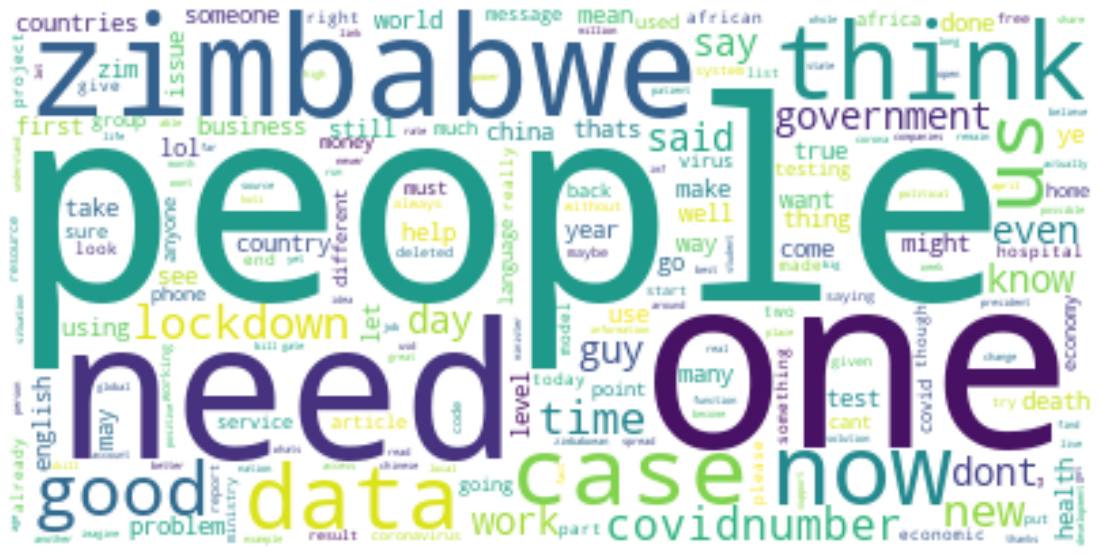

In [11]:
plt.figure(figsize=[20, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(clean)

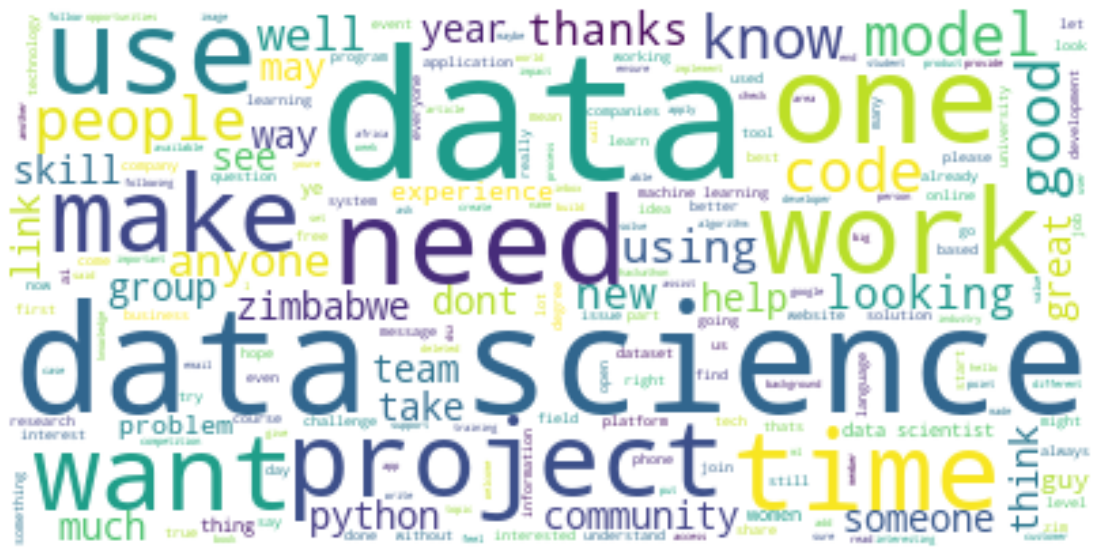

In [11]:
plt.figure(figsize=[20, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(clean)

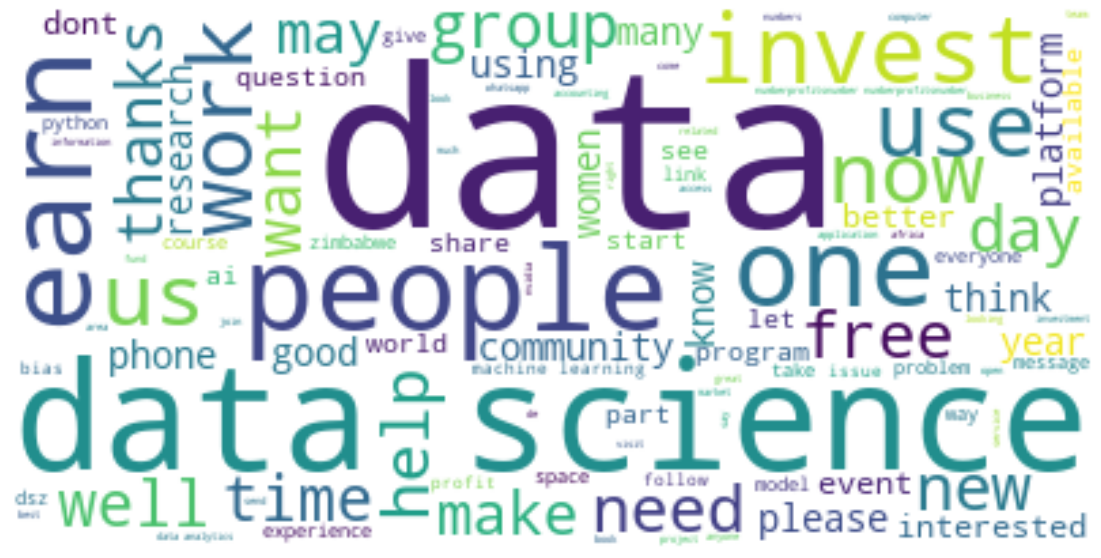

In [11]:
plt.figure(figsize=[20, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The 3 wordclouds generated for the 3 groups are as shown above. With the words most included in discussions shown by the size of the word in the wordcloud. 
Interesting to note that the 1st group has more diverging conversation from data science whilst the other 2 stick more to the field. 
The data would probably need a bit more cleaning, as the package didn't comprehensively deal with urls, maybe because it removes punctutation first and so then urls just become words. So it would also be prudent to follow up on that aspect. 